**Group 8: Yu-Fang Liao, Han Nga Chan, Yumeng Tang**
---



## **Install necessary packages:**

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil

# used to supress display of warnings
import warnings

from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

In [ ]:
enable_wandb = True
use_gpu = True

In [ ]:
gpu_available = torch.cuda.is_available()
gpu_available

False

In [ ]:
if enable_wandb:
  !pip install wandb -qU
  import wandb
  wandb.login()

wandb: Currently logged in as: tangyum. Use `wandb login --relogin` to force relogin


## **Data Preparation**

In [ ]:
# # Unzip the 105_classes_pins_dataset.zip file
# import zipfile
# with zipfile.ZipFile("105_classes_pins_dataset.zip","r") as zip_ref:
#     zip_ref.extractall("img")

In [ ]:
# # Unzip the bollywood.zip
# with zipfile.ZipFile("bollywood.zip","r") as zip_ref:
#     zip_ref.extractall("img")

In [ ]:
# Only need to be done once
"""
# Move all the folders in bollywood_celeb_faces_0 to all_img_folder
source = 'img/bollywood/bollywood_celeb_faces_0'
destination = 'img/all_img_folder/'

# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)
"""

"\n# Move all the folders in bollywood_celeb_faces_0 to all_img_folder\nsource = 'img/bollywood/bollywood_celeb_faces_0'\ndestination = 'img/all_img_folder/'\n\n# gather all files\nallfiles = os.listdir(source)\n\n# iterate on all files to move them to destination folder\nfor f in allfiles:\n    src_path = os.path.join(source, f)\n    dst_path = os.path.join(destination, f)\n    shutil.move(src_path, dst_path)\n"

In [ ]:
# Only need to be done once
"""
# Move all the folders in bollywood_celeb_faces_1 to the all_img_folder
source = 'img/bollywood/bollywood_celeb_faces_1'
destination = 'img/all_img_folder/'

# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)
"""

"\n# Move all the folders in bollywood_celeb_faces_1 to the all_img_folder\nsource = 'img/bollywood/bollywood_celeb_faces_1'\ndestination = 'img/all_img_folder/'\n\n# gather all files\nallfiles = os.listdir(source)\n\n# iterate on all files to move them to destination folder\nfor f in allfiles:\n    src_path = os.path.join(source, f)\n    dst_path = os.path.join(destination, f)\n    shutil.move(src_path, dst_path)\n"

In [ ]:
# Only need to be done once
"""
# Move all the folders in bollywood_celeb_faces2 to the all_img_folder
source = 'img/bollywood/bollywood_celeb_faces2'
destination = 'img/all_img_folder/'

# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)
"""

"\n# Move all the folders in bollywood_celeb_faces2 to the all_img_folder\nsource = 'img/bollywood/bollywood_celeb_faces2'\ndestination = 'img/all_img_folder/'\n\n# gather all files\nallfiles = os.listdir(source)\n\n# iterate on all files to move them to destination folder\nfor f in allfiles:\n    src_path = os.path.join(source, f)\n    dst_path = os.path.join(destination, f)\n    shutil.move(src_path, dst_path)\n"

In [ ]:
# Only need to be done once
"""
# Move all the folders in 105_classes_pins_dataset to the all_img_folder
source = 'img/105_classes_pins_dataset'
destination = 'img/all_img_folder/'

# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)
"""

"\n# Move all the folders in 105_classes_pins_dataset to the all_img_folder\nsource = 'img/105_classes_pins_dataset'\ndestination = 'img/all_img_folder/'\n\n# gather all files\nallfiles = os.listdir(source)\n\n# iterate on all files to move them to destination folder\nfor f in allfiles:\n    src_path = os.path.join(source, f)\n    dst_path = os.path.join(destination, f)\n    shutil.move(src_path, dst_path)\n"

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# main_directory = '/content/drive/My Drive/female/' # this is for randomly selected 20 Females
# main_directory = '/content/drive/My Drive/male/' # this is for randomly selected 20 Males
# main_directory = '/content/drive/My Drive/Female_all/' # this is for all Females
# main_directory = '/content/drive/My Drive/Male_all/' # randomly selected 50 males
main_directory = 'male/'

In [ ]:
# Specify the path to the main directory
# main_directory = 'img/all_img_folder' # Including both datasets
# main_directory = 'img/105_classes_pins_dataset/'
# main_directory = 'img/female/'

# from google.colab import drive
# drive.mount('/content/drive')

# main_directory = '/content/drive/My Drive/female/'
# main_directory = '/content/drive/My Drive/male/'
# main_directory = '/content/drive/My Drive/Female_all/'
# main_directory = '/content/drive/My Drive/Male_all/'

main_directory = 'male/'

# Initialize counts
folder_count = 0
total_file_count = 0

# Iterate through the main directory
for root, dirs, files in os.walk(main_directory):
    # Count folders
    folder_count += len(dirs)

    # Count files in each folder
    folder_file_count = len(files)
    total_file_count += folder_file_count

    # Print the folder name and the number of files in that folder
    print(f"Folder: {os.path.basename(root)}, Files: {folder_file_count}")

# Print the overall results
print(f"\nNumber of folders: {folder_count}")
print(f"Total number of files: {total_file_count}")

Folder: , Files: 0
Folder: Robert Downey Jr, Files: 433
Folder: Mark Zuckerberg, Files: 295
Folder: Leonardo DiCaprio, Files: 437
Folder: Tom Cruise, Files: 392
Folder: Tom Hardy, Files: 398
Folder: Dwayne Johnson, Files: 341
Folder: Chris Evans, Files: 366
Folder: Mark Ruffalo, Files: 378
Folder: Johnny Depp, Files: 382
Folder: Jimmy Fallon, Files: 313
Folder: Tom Hiddleston, Files: 381
Folder: Alvaro Morte, Files: 339
Folder: elon musk, Files: 335
Folder: Bill Gates, Files: 322
Folder: Chris Hemsworth, Files: 359
Folder: Chris Pratt, Files: 376
Folder: Jason Momoa, Files: 384
Folder: Ben Affleck, Files: 326
Folder: Tom Holland, Files: 389
Folder: Cristiano Ronaldo, Files: 298

Number of folders: 20
Total number of files: 7244


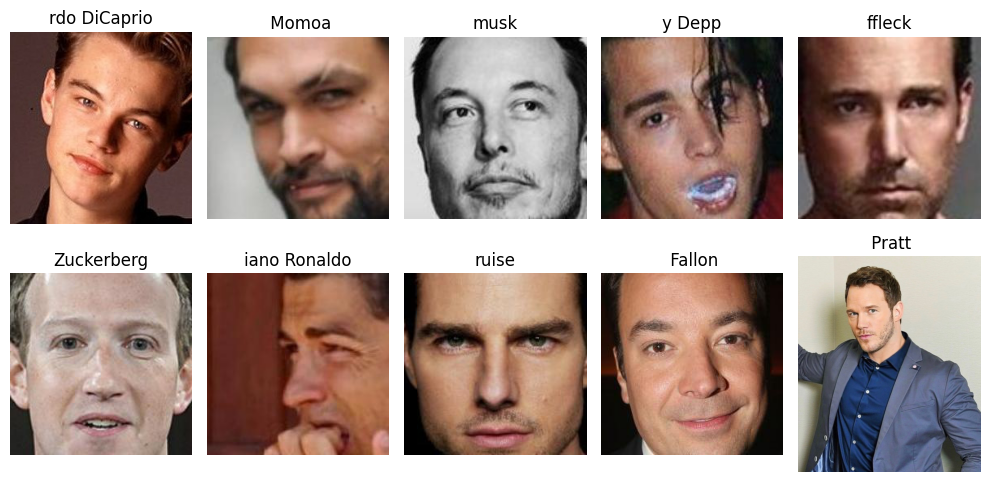

In [ ]:
import random
import matplotlib.image as mpimg

# Specify the path to the main directory, need to adjust the dataset location for males and females and adjust the number of classes
# main_directory = 'img/all_img_folder' # Including both datasets
# main_directory = 'img/105_classes_pins_dataset/'
# main_directory = '/content/drive/My Drive/female/'
# main_directory = '/content/drive/My Drive/Female_all/'
# main_directory = '/content/drive/My Drive/Male_all/'
# main_directory = '/content/drive/My Drive/male/'
main_directory = 'male/'

# Get a list of all folders
all_folders = [folder for folder in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, folder))]

# Randomly pick 10 folders
selected_folders = random.sample(all_folders, 10)

# Create a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through selected folders and display one random image from each folder
for i, folder in enumerate(selected_folders):
    folder_path = os.path.join(main_directory, folder)
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]

    # Randomly pick one image
    selected_image = random.choice(all_images)

    # Get the full path to the selected image
    image_path = os.path.join(folder_path, selected_image)

    # Read and display the image
    img = mpimg.imread(image_path)
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].axis('off')

    # Extract label from folder name and drop the first 5 characters
    label = folder[5:]
    axes[i // 5, i % 5].set_title(label)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Hyper-parameters

In [ ]:
# Hyperparameters

configs = {
    "project_name": "Team Project - Face Recognition",
    "experiment_name": "1st-20230415",
    "freeze_feature_extraction_layers": True,
    "pretrained":True,
    "efficientnet":False,
    "data_augmentation":False,
    "transferlearning": True,

    # Data
    "img_dimensions" : (3,224,224),
    "batch_size" : 32,
    "num_classes" : 20, # use 20, or 50 if we use all females file instead of 205

    # CNN
    "filter_sizes" : [4,8],
    "kernel_size" : 5,
    "stride": 2,
    "padding":1,

    #Optimzation
    "learning_rate" : 0.01,
    "epochs" : 10,
    "weight_decay" : 0.00001
}

# Transformation

In [ ]:
# Transformations
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
if configs["data_augmentation"]:
  transform = transforms.Compose([
      transforms.RandomHorizontalFlip(0.5), # 50% of the person will flip
      transforms.Resize(224),       # Resize the image to 224x224 pixels while maintaining aspect ratio
      transforms.RandomCrop(224),
      transforms.RandomRotation(45), # Random rotate
      transforms.ColorJitter(), # Need to be carefor of this for randomly adjusting the brightness, contrast, saturation and hue of images
      transforms.ToTensor(),               # Convert the image to a PyTorch tensor
      transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize the tensor using the mean and
                      std=[0.229, 0.224, 0.225])       # standard deviation of the ImageNet dataset
  ])
else:
  transform = transforms.Compose([
      transforms.Resize(224),       # Resize the image to 224x224 pixels while maintaining aspect ratio
      transforms.CenterCrop(224),
      transforms.ToTensor(),               # Convert the image to a PyTorch tensor
      transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize the tensor using the mean and
                      std=[0.229, 0.224, 0.225])       # standard deviation of the ImageNet dataset
  ])


import torchvision
whole_dataset = torchvision.datasets.ImageFolder(main_directory, transform=transform)
train_dataset, val_dataset = random_split(whole_dataset, [0.7, 0.3])
test_dataset, val_dataset = random_split(val_dataset, [0.5, 0.5])

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=configs["batch_size"], shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=configs["batch_size"], shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=configs["batch_size"], shuffle=False)

In [ ]:
train_dataset[0][0]

tensor([[[ 0.9303,  0.9132,  0.9132,  ...,  0.8618,  0.8618,  0.8618],
         [-1.6727, -1.6727, -1.6727,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8439, -1.9295, -1.9124,  ..., -2.1008, -2.1008, -2.1008],
         ...,
         [-1.5528, -1.5528, -1.5699,  ..., -1.5870, -1.6213, -1.6213],
         [-1.3302, -1.3130, -1.3644,  ..., -1.6213, -1.6213, -1.6213],
         [ 1.0159,  1.0331,  0.9988,  ...,  0.9474,  0.9474,  0.9474]],

        [[ 1.3606,  1.3606,  1.3782,  ...,  1.2731,  1.2731,  1.2731],
         [-1.4405, -1.4405, -1.4405,  ..., -1.7731, -1.7731, -1.7731],
         [-1.6331, -1.6681, -1.6331,  ..., -2.0182, -2.0182, -2.0182],
         ...,
         [-1.6155, -1.6506, -1.6331,  ..., -1.8256, -1.8256, -1.8256],
         [-1.4055, -1.4230, -1.4230,  ..., -1.7206, -1.7206, -1.7206],
         [ 1.3606,  1.3606,  1.3606,  ...,  1.2731,  1.2731,  1.2731]],

        [[-1.3687, -1.3687, -1.3687,  ..., -1.3861, -1.3861, -1.3861],
         [-1.4733, -1.4559, -1.4559,  ..., -1

# VGG Model

We implemented pre-trained VGG16 convolutional neural network model, which was initially trained on the large-scale ImageNet dataset. Despite potentially having a smaller training dataset, we anticipated achieving high accuracy by taking advantage of the powerful feature representations learned by VGG16 on a vast collection of images. We replaced the original fully connected classifier layers with a custom sequence tailored to our specific problem: a flattening layer followed by two fully connected layers with ReLU activations and dropout regularization, culminating in a linear output layer mapping to the number of face classes in our dataset (ranging from 20 to 105).

In [ ]:
# # MLP model
# class CNN(nn.Module):
#     def __init__(self, output_size):
#         super(CNN, self).__init__()
#         self.model = nn.Sequential(
#             torch.nn.Conv2d(configs["img_dimensions"][0], configs["filter_sizes"][0], configs["kernel_size"], stride=configs["stride"], padding=configs["padding"]),
#             torch.nn.ReLU(),
#             torch.nn.Conv2d(configs["filter_sizes"][0], configs["filter_sizes"][1], configs["kernel_size"], stride=configs["stride"], padding=configs["padding"]),
#             torch.nn.MaxPool2d(2),
#             nn.Flatten(),
#             nn.Linear(72, output_size) # We can determine the 72 here by doing calculations offline or looking at the error.
#         )

#     # Defines the forward pass.
#     def forward(self, x):
#         x = x.view(-1, configs["img_dimensions"][0], configs["img_dimensions"][1], configs["img_dimensions"][2])
#         return self.model(x)

In [ ]:
# summary of vgg model
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
class VGGCNN(nn.Module):
    def __init__(self, output_size):
        super(VGGCNN, self).__init__()
        # Load pre-trained VGG and use its features
        base_model = models.vgg16(pretrained=True)  # Load pre-trained VGG16
        self.features = base_model.features

        # Freeze the feature layers (optional, depending on whether you want to fine-tune them)
        for param in self.features.parameters():
            param.requires_grad = False

        # Replace the classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 7 * 7, 4096),  # Assuming input size of 224x224 to the network
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, output_size)
        )

    def forward(self, x):
        x = self.features(x)  # Pass input through feature layers
        x = x.view(x.size(0), -1)  # Flatten the features
        x = self.classifier(x)  # Pass through the classifier
        return x

In [ ]:
import torchvision.models as models

if configs["transferlearning"]:
  if not configs["efficientnet"]:
    model = models.vgg16(pretrained=configs["pretrained"])
  else:
    model = torch.hub.load("pytorch/vision", "efficientnet_b2", weights="EfficientNet_B2_Weights.IMAGENET1K_V1")
else:
  model = VGGCNN(configs["num_classes"])

if gpu_available and use_gpu:
  model = model.cuda()

In [ ]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Replace the last layer(s)
if configs["transferlearning"]:
  if configs["efficientnet"]:
    model.classifier[1] = torch.nn.Sequential(torch.nn.Linear(1408, 100), torch.nn.ReLU(), torch.nn.Linear(100, configs["num_classes"]))
  else:
    model.fc = torch.nn.Sequential(torch.nn.Linear(512, 100), torch.nn.ReLU(), torch.nn.Linear(100, configs["num_classes"]))  # The name of the layer is fc --> remove the original layer and add these to the layer
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Freeze other layers
if configs["transferlearning"] and configs["freeze_feature_extraction_layers"]:
    # Freeze all the layers in the feature extraction part of the model
    for param in model.features.parameters():
        param.requires_grad = False

    # Unfreeze the classifier layers
    for param in model.classifier.parameters():
        param.requires_grad = True

In [ ]:
# use torch-summary for more info on the model
!pip install torchinfo

Below is the summary of the final VGG16 model:

In [ ]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                   Param #
VGG                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       (1,792)
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       (36,928)
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
│    └─Conv2d: 2-6                       (73,856)
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       (147,584)
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
│    └─Conv2d: 2-11                      (295,168)
│    └─ReLU: 2-12                        --
│    └─Conv2d: 2-13                      (590,080)
│    └─ReLU: 2-14                        --
│    └─Conv2d: 2-15                      (590,080)
│    └─ReLU: 2-16                        --
│    └─MaxPool2d: 2-17                   --
│    └─Conv2d: 2-18                      (1,180,160)
│    └─ReLU: 2-19

In [ ]:
print(model.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [ ]:
# # Replace classifier with new layer(s) that match number of classes in dataset

# if configs["transferlearning"]:
#     # Replace the classifier part of VGG
#     num_features = model.classifier[6].in_features  # Get the number of input features to the last layer
#     model.classifier = nn.Sequential(
#         nn.Linear(num_features, 100),  # Reduce from input features to 100
#         nn.ReLU(),
#         nn.Dropout(0.5),
#         nn.Linear(100, configs["num_classes"])  # Final output layer for your number of classes
#     )

# Loss: Cross-Entropy

In [ ]:
criterion = nn.CrossEntropyLoss()

# Optimizer: SGD

In [ ]:
optimizer = optim.SGD(model.parameters(), momentum=0.9, lr=configs["learning_rate"], weight_decay=configs["weight_decay"])

# Training

In [ ]:
if enable_wandb:
  wandb.init(
    # Set the project where this run will be logged
    project=configs["project_name"],
    # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
    name=configs["experiment_name"],
    # Track hyperparameters and run metadata
    config=configs)

In [ ]:
## There is a package called torchmetrics that makes calculating accuracy easier.
# !pip install -U torchmetrics
# import torchmetrics

def get_accuracy(dataloader, model):
  acc = 0
  # <OR>
  # acc = torchmetrics.Accuracy()

  with torch.no_grad():
      for images, labels in dataloader:
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          outputs = model(images) # get predictions

          # Update accuracy for this batch
          acc = acc + torch.sum(torch.argmax(outputs, axis=1) == labels)
          # <OR>
          # acc.update(outputs, labels)


      # Compute the accuracy
      acc = acc/len(dataloader.dataset) # normalizes
      # <OR>
      # acc = acc.compute()

      return acc

In [ ]:
def get_loss(loader):
  with torch.no_grad(): # Anything under torch.no_grad will be calculated with no gradients. Can only be used for testing, not training!

    loss = 0
    for i, (images, labels) in enumerate(loader): # The batches.
          # step1: Move data to cuda. Make sure the model is on cuda too!
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          # step2: Forward pass
          outputs = model(images)

          # step 3: calculate the loss.
          loss = loss + criterion(outputs, labels)
    return loss/ len(loader)

# Early-stopping class

In [ ]:
class EarlyStopper:
    def __init__(self, patience=1):
        self.patience = patience
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        # If the new loss is lower than the old loss, reset the counter!
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
            # Keep track of the best model by saving it on the hard drive.
            torch.save(model.state_dict(), "./best_model.pt")
        # otherwise, increment the counter.
        elif validation_loss > self.min_validation_loss:
            self.counter += 1
            # If there has been too many epochs with the loss being high, terminate.
            if self.counter >= self.patience:
                return True
        return False


# Hyper Parameter Tuning - Grid Search

In [ ]:
pip install wandb

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import wandb
from wandb.keras import WandbCallback
import torch
import torchvision.models as models
from torch import nn, optim

In [ ]:
#wandb.init()

In [ ]:
sweep_config = {
    'method': 'grid',
    'metric': {
        'name': 'val_accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {
            'values': [0.001, 0.01, 0.1]
        },
        'batch_size': {
            'values': [16, 32, 64]
        },
        'optimizer': {
            'values': ['Adam', 'SGD']
        }
    }
}

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

def train():
    with wandb.init() as run:
        config = wandb.config

        model = models.vgg16(pretrained=True)
        # num_features = model.fc.in_features
        # model.fc = nn.Linear(num_features, configs["num_classes"])
        num_features = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_features, configs["num_classes"])


        if torch.cuda.is_available():
            model.cuda()

        train_loader = DataLoader(dataset=train_dataset, batch_size=config.batch_size, shuffle=True)
        val_loader = DataLoader(dataset=val_dataset, batch_size=config.batch_size, shuffle=False)
        test_loader = DataLoader(dataset=test_dataset, batch_size=config.batch_size, shuffle=False)

        optimizer = getattr(optim, config.optimizer)(model.parameters(), lr=config.learning_rate)
        criterion = nn.CrossEntropyLoss()

        # Initialize the learning rate scheduler
        scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=5, verbose=True)

        # Initialize the early stopper
        early_stopper = EarlyStopper(patience=3)  # Adjust the patience to your needs

        for epoch in range(configs["epochs"]):
            for i, (images, labels) in enumerate(train_loader):
                optimizer.zero_grad()
                if torch.cuda.is_available():
                    images = images.cuda()
                    labels = labels.cuda()

                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                if i % 100 == 0:
                    print(f"Epoch {epoch + 1}, batch {i + 1}. Training Loss: {loss.item()}")
                    if enable_wandb:
                        wandb.log({"loss": loss})

            train_acc = get_accuracy(train_loader, model)
            test_acc = get_accuracy(val_loader, model)
            validation_loss = get_loss(val_loader)
            wandb.log({"val_loss": validation_loss, "epoch": epoch + 1, "LR": optimizer.param_groups[0]['lr'], "train_accuracy": train_acc, "val_accuracy": test_acc})

            print(f'Epoch [{epoch + 1}/{configs["epochs"]}], LR: {optimizer.param_groups[0]["lr"]}, Validation Loss: {validation_loss:.4f}, Train Accuracy: {train_acc:.4f}, Validation Accuracy: {test_acc:.4f}')

            scheduler.step(validation_loss)

            # Check for early stopping
            if early_stopper.early_stop(validation_loss):
                print("Validation loss hasn't dropped. Early stopping!")
                break

        # Log the final results with the last computed validation accuracy
        wandb.log({'Test Accuracy': test_acc})

In [ ]:
sweep_id = wandb.sweep(sweep_config, project=configs['project_name'])
wandb.agent(sweep_id, train, count=10)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: u8e7xq7i
Sweep URL: https://wandb.ai/tangyum/Team%20Project%20-%20Face%20Recognition/sweeps/u8e7xq7i


wandb: Agent Starting Run: g9vo5sxs with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.001
wandb: 	optimizer: Adam


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


Exception in thread Exception in thread IntMsgThr:
Exception in thread ChkStopThrNetStatThr:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
  File "/opt/anaconda3/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
            self.run()self.run()self.run()

  File "/opt/anaconda3/lib/python3.11/threading.py", line 982, in run

  File "/opt/anaconda3/lib/python3.11/threading.py", line 982, in run
        self._target(*self._args, **self._kwargs)self._target(*self._args, **self._kwargs)

  File "/opt/anaconda3/lib/python3.11/site-packages/wandb/sdk/wandb_run.py", line 300, in check_internal_messages
  File "/opt/anaconda3/lib/python3.11/threading.py", line 982, in run
  File "/opt/anaconda3/lib/python3.11/site-packages/wandb/sdk/wandb_run.py", line 286, 

Epoch 1, batch 1. Training Loss: 3.0474963188171387
Epoch 1, batch 101. Training Loss: 3.0420284271240234
Epoch 1, batch 201. Training Loss: 3.0205283164978027
Epoch 1, batch 301. Training Loss: 3.0586819648742676
Epoch [1/10], LR: 0.001, Validation Loss: 12.3429, Train Accuracy: 0.0546, Validation Accuracy: 0.0479
Epoch 2, batch 1. Training Loss: 3.0102946758270264
Epoch 2, batch 101. Training Loss: 2.995784282684326
Epoch 2, batch 201. Training Loss: 2.9767024517059326
Epoch 2, batch 301. Training Loss: 3.029329776763916
Epoch [2/10], LR: 0.001, Validation Loss: 12.4111, Train Accuracy: 0.0600, Validation Accuracy: 0.0543
Epoch 3, batch 1. Training Loss: 2.9881277084350586
Epoch 3, batch 101. Training Loss: 3.023235559463501
Epoch 3, batch 201. Training Loss: 3.0370681285858154
Epoch 3, batch 301. Training Loss: 3.066659688949585
Epoch [3/10], LR: 0.001, Validation Loss: 12.3800, Train Accuracy: 0.0631, Validation Accuracy: 0.0534
Epoch 4, batch 1. Training Loss: 3.0492286682128906
E

wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.


Epoch 4, batch 201. Training Loss: 2.9988420009613037
Epoch 4, batch 301. Training Loss: 2.9678075313568115
Epoch [4/10], LR: 0.001, Validation Loss: 12.3746, Train Accuracy: 0.0533, Validation Accuracy: 0.0497
Validation loss hasn't dropped. Early stopping!


LR,▁▁▁▁
Test Accuracy,▁
epoch,▁▃▆█
loss,▇▆▅▇▄▃▂▅▂▅▆█▇▃▃▁
train_accuracy,▂▆█▁
val_accuracy,▁█▇▃
val_loss,▁█▅▄
LR,0.001
Test Accuracy,0.04972
epoch,4
loss,2.96781


wandb: Agent Starting Run: m3e9twqu with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.001
wandb: 	optimizer: SGD


Epoch 1, batch 1. Training Loss: 3.1518611907958984
Epoch 1, batch 101. Training Loss: 2.862802267074585
Epoch 1, batch 201. Training Loss: 2.819288492202759
Epoch 1, batch 301. Training Loss: 2.822571277618408
Epoch [1/10], LR: 0.001, Validation Loss: 12.3539, Train Accuracy: 0.2412, Validation Accuracy: 0.2238
Epoch 2, batch 1. Training Loss: 2.481771230697632
Epoch 2, batch 101. Training Loss: 2.1116294860839844
Epoch 2, batch 201. Training Loss: 2.4029829502105713
Epoch 2, batch 301. Training Loss: 1.668756365776062
Epoch [2/10], LR: 0.001, Validation Loss: 12.3410, Train Accuracy: 0.4736, Validation Accuracy: 0.4098
Epoch 3, batch 1. Training Loss: 1.778611183166504
Epoch 3, batch 101. Training Loss: 1.705308437347412
Epoch 3, batch 201. Training Loss: 1.2476166486740112


wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.


Epoch 3, batch 301. Training Loss: 1.4310005903244019
Epoch [3/10], LR: 0.001, Validation Loss: 12.3396, Train Accuracy: 0.6146, Validation Accuracy: 0.5258
Epoch 4, batch 1. Training Loss: 1.7055063247680664
Epoch 4, batch 101. Training Loss: 0.8383513689041138
Epoch 4, batch 201. Training Loss: 1.2327663898468018
Epoch 4, batch 301. Training Loss: 0.8774459362030029
Epoch [4/10], LR: 0.001, Validation Loss: 12.3623, Train Accuracy: 0.7189, Validation Accuracy: 0.6114
Epoch 5, batch 1. Training Loss: 1.0830351114273071
Epoch 5, batch 101. Training Loss: 1.391444206237793
Epoch 5, batch 201. Training Loss: 0.8167292475700378
Epoch 5, batch 301. Training Loss: 0.7346836924552917
Epoch [5/10], LR: 0.001, Validation Loss: 12.2965, Train Accuracy: 0.7734, Validation Accuracy: 0.6455
Epoch 6, batch 1. Training Loss: 0.7240228056907654
Epoch 6, batch 101. Training Loss: 0.7882122993469238
Epoch 6, batch 201. Training Loss: 0.3283189833164215
Epoch 6, batch 301. Training Loss: 1.1031912565231

LR,▁▁▁▁▁▁▁▁
Test Accuracy,▁
epoch,▁▂▃▄▅▆▇█
loss,█▇▇▇▆▆▆▅▅▅▄▄▅▃▄▃▃▄▃▃▂▃▂▃▃▂▂▃▂▂▂▁
train_accuracy,▁▃▅▆▇▇██
val_accuracy,▁▄▅▇▇▇██
val_loss,▅▄▄▅▁█▄▃
LR,0.001
Test Accuracy,0.71547
epoch,8
loss,0.06587


wandb: Agent Starting Run: 2iuy594q with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.01
wandb: 	optimizer: Adam


Epoch 1, batch 1. Training Loss: 3.1141791343688965


# Train!

In [ ]:
# if gpu_available and use_gpu:
#   model = model.cuda()

In [ ]:
# early_stopper = EarlyStopper(patience=7)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.3, patience=3)

# # Training loop
# for epoch in range(configs["epochs"]): # The epochs.
#     for i, (images, labels) in enumerate(train_loader): # The batches.
#         # step 1: Zero out the gradients.
#         optimizer.zero_grad()

#         # step 1.1 move data to cuda. Make sure the model is on cuda too!
#         if gpu_available and use_gpu:
#           images = images.cuda()
#           labels = labels.cuda()

#         # step2: Forward pass
#         outputs = model(images)

#         # step 3: calculate the loss.
#         loss = criterion(outputs, labels)

#         # step 4: Backward pass
#         loss.backward()
#         optimizer.step()

#         # Print the loss
#         if i %100 == 0:
#           print("Epoch", epoch+ 1, " batch", i+1, ". Training Loss: ", loss.item())
#           if enable_wandb:
#             wandb.log({"loss": loss})

#     # Compute total train accuracy
#     train_acc = get_accuracy(train_loader, model)
#     test_acc = get_accuracy(val_loader, model)

#     validation_loss = get_loss(val_loader)
#     wandb.log({"val_loss": validation_loss})

#     print(f'Epoch [{epoch + 1}/{configs["epochs"]}], LR: {optimizer.param_groups[0]["lr"]}, Validation Loss: {validation_loss.item():.4f}, Train Accuracy: {train_acc.item():.4f}, Validation Accuracy: {test_acc.item():.4f}')
#     if enable_wandb:
#       wandb.log({"epoch": epoch + 1, "LR": {optimizer.param_groups[0]['lr']}, "train_accuracy": train_acc.item(), "val_accuracy": test_acc.item()})

#     scheduler.step(validation_loss)

#     if early_stopper.early_stop(validation_loss):
#         print("Validation loss hasn't dropped. Early stopping!")
#         break

# Test

In [ ]:
print("last model performance on Test set:", get_accuracy(test_loader, model))

# Once training is done, load the best model (might not be the last model due to early stopping)
model.load_state_dict(torch.load("./best_model.pt"))
acc = get_accuracy(test_loader, model)
print("best model performance Test set:", acc)

if enable_wandb:
  wandb.summary['Test Accuracy'] = acc.item()

In [ ]:
if enable_wandb:
  wandb.finish()

# Confusion Matrix

In [ ]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# mapping from label indices to human-readable names

label_names = {
    0: 'Alvaro Morte', 1: 'Ben Affleck', 2: 'Bill Gates', 3: 'Chris Evans',
    4: 'Chris Hemsworth', 5: 'Chris Pratt', 6: 'Cristiano Ronaldo', 7: 'Dwayne Johnson',
    8: 'elon musk', 9: 'Jason Momoa', 10: 'Jimmy Fallon', 11: 'Johnny Depp',
    12: 'Leonardo DiCaprio', 13: 'Mark Ruffalo', 14: 'Mark Zuckerberg', 15: 'Robert Downey Jr',
    16: 'Tom Cruise', 17: 'Tom Hardy', 18: 'Tom Hiddleston', 19: 'Tom Holland'
}


model.eval()  # Set the model to evaluation mode

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)  # Get predicted class labels
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert numeric predictions to actual names
predicted_labels = [label_names[label] for label in all_preds]

# print the predictions
for prediction in predicted_labels:
    print(prediction)

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

cm_label_names = [label_names[i] for i in range(len(label_names))]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_label_names)
disp.plot(cmap=plt.cm.Blues, values_format=".0f", xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

# **Reference:**

1. https://www.kaggle.com/code/vinayakshanawad/celebrity-face-recognition-vggface-model
2. https://stackoverflow.com/questions/3451111/unzipping-files-in-python
3. https://www.geeksforgeeks.org/how-to-move-all-files-from-one-directory-to-another-using-python/
4. https://www.kaggle.com/code/alkanerturan/facedetection-recognition/notebook
5. https://www.kaggle.com/code/saeedghamshadzai/face-rec-cnn-tf-acc-71-52
6. https://www.v7labs.com/blog/train-validation-test-set